In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### 1. Suppose that we have a standard IR evaluation data set containing 1000 documents. 

Assume that a particular query in this data set is deemed to be relevant to the following 25 documents in the collection:

REL = { d1, d5, d6, d10, d88, d150, d200, d210, d250, d300, d400, d405, d450, d472, d500, d501, d530, d545, d590, d600, d635, d700, d720, d800, d900 }

Two different retrieval systems S1 and S2 are used to retrieve ranked lists of documents from this collection using the above query. The top 10 retrieved documents for these two systems are given below (each list is in decreasing order of relevance).

RET(S1) = d2, d5, d150, d250, d11, d33, d50, d600, d500, d520 
RET(S2) = d250, d400, d150, d210, d999, d3, d501, d800, d205, d300

In [4]:
REL = ["d1", "d5", "d6","d10","d88","d150","d200","d210","d250","d300","d400","d405","d450","d472","d500","d501","d530","d545","d590","d600","d635","d700","d720","d800","d900"] 
RET_S1 = ["d2","d5","d150","d250","d11","d33","d50","d600","d500","d520"]
RET_S2 = ["d250","d400", "d150", "d210", "d999", "d3", "d501","d800","d205","d300"]


#### Create a Precision-Recall graph that compares the performance of the two systems.  Use raw precision and recall values.

In [27]:
def counter(RIsys):
    recall=[]
    precision=[]
    count=0
    for i in RIsys :
        if i in REL:
            count=1+count
        else:
            count=0+count
        recall.append(count/len(REL))
        precision.append(count/len(recall))
        
    return recall,precision

In [36]:
RET_S1_r,RET_S1_p=counter(RET_S1)
RET_S2_r,RET_S2_p=counter(RET_S2)

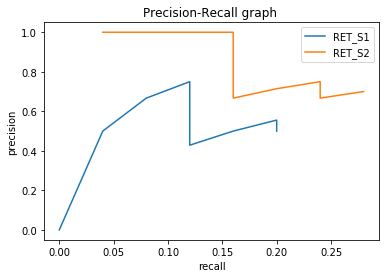

In [45]:
plt.plot(RET_S1_r,RET_S1_p,label="RET_S1")
plt.plot(RET_S2_r,RET_S2_p,label="RET_S2")
plt.legend()
plt.xlabel("recall")
plt.ylabel("precision")
plt.title("Precision-Recall graph ")
plt.show()

In [166]:
print("The precision score for RET_S1",np.round(RET_S1_p,2))
print("The recall score for RET_S1",np.round(RET_S1_r,2))
print("\n")
print("The precision score for RET_S2",np.round(RET_S2_p,2))
print("The recall score for RET_S2",np.round(RET_S2_r,2))

The precision score for RET_S1 [0.   0.5  0.67 0.75 0.6  0.5  0.43 0.5  0.56 0.5 ]
The recall score for RET_S1 [0.   0.04 0.08 0.12 0.12 0.12 0.12 0.16 0.2  0.2 ]


The precision score for RET_S2 [1.   1.   1.   1.   0.8  0.67 0.71 0.75 0.67 0.7 ]
The recall score for RET_S2 [0.04 0.08 0.12 0.16 0.16 0.16 0.2  0.24 0.24 0.28]


#### A single metric that can be used to combine precision and recall is the F Measure . Using the F1 measure (F measure with B=1), create a graph that shows F1 vs. # of documents returned

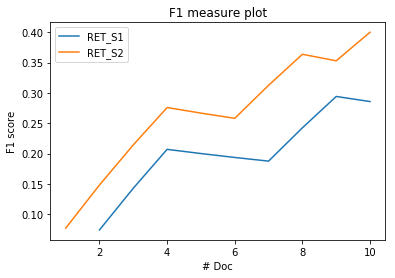

In [159]:
n=[2*(a*b) for a, b in zip(RET_S1_r,RET_S1_p)]
d=[sum(x) for x in zip(RET_S1_r,RET_S1_p)]
f=[n1/d1 for n1,d1 in zip(n,d) if n1 and d1 !=0]
plt.plot(range(2,11),f,label="RET_S1")
plt.xlabel("# Doc")
plt.ylabel("F1 score")
plt.title("F1 measure plot")

n_2=[2*(a*b) for a, b in zip(RET_S2_r,RET_S2_p)]
d_2=[sum(x) for x in zip(RET_S2_r,RET_S2_p)]
f1_2=[n2/d2 for n2,d2 in zip(n_2,d_2)]

plt.plot(range(1,11),f1_2,label="RET_S2")
plt.xlabel("# Doc")
plt.ylabel("F1 score")
plt.title("F1 measure plot")

plt.legend()
plt.show()

In [163]:
print("The F1 score for RET_S1",np.round(f,2))
print("The F1 score for RET_S2",np.round(f1_2,2))

The F1 score for RET_S1 [0.07 0.14 0.21 0.2  0.19 0.19 0.24 0.29 0.29]
The F1 score for RET_S2 [0.08 0.15 0.21 0.28 0.27 0.26 0.31 0.36 0.35 0.4 ]


According to information above, we can learn that Ret_s2 system seems to perform better and retrieve more relevant documents because its precision scores and recall scores are all higher during the top 10 retrieved documents. The F1 scores that consider both recall score and precision score also indicate that Ret_s2 performs better for the document retrieval task. 

#### 2. Use the query "jaguar" on three search engines Google, Yahoo, and Bing. Assume that you are interested in the sense of "Jaguar" as an animal . For each of your searches, record the top 10 results (do not count the "sponsored" results). 

Make a precision plot for the first 10 returned links as function of the number of returned documents, comparing the precision of the three search engines for this query. Which of the search engines did better?

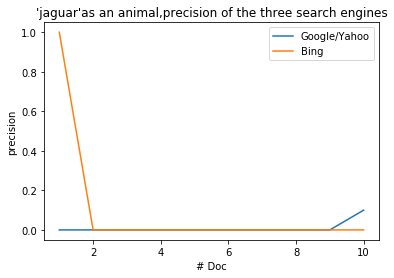

In [20]:
#'jaguar'as animal
d=[i for i in range(1,11)]
from itertools import repeat
google_n=[i for i in repeat(0,9)]
google_n.append(1)

Bing_n=[1]
for i in repeat(0,9):
    Bing_n.append(i)

plt.plot(d,[n/d for n,d in zip(google_n,d)],label="Google/Yahoo")
plt.plot(d,[n/d for n,d in zip(Bing_n,d)],label="Bing")
plt.title("'jaguar'as an animal,precision of the three search engines")
plt.xlabel("# Doc")
plt.ylabel("precision")

plt.legend()
plt.show()

In [158]:
print("The precision for Google and Yahoo: ",[n/d for n,d in zip(google_n,d)])
print("The precision for Bing: ",[n/d for n,d in zip(Bing_n,d)])

The precision for Google and Yahoo:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1]
The precision for Bing:  [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


The search results for both Google and Yahoo are similar. It seems that Bing is more conservative and accurate one when searching for the term “jaguar” as an animal. 

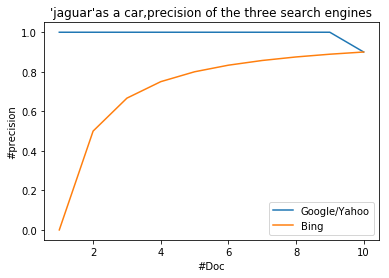

The precision for Google and Yahoo:  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9]
The precision for Bing:  [0.   0.5  0.67 0.75 0.8  0.83 0.86 0.88 0.89 0.9 ]


In [26]:
#'jaguar'as a car
g_p=[i/i for i in range(1,10)]
g_p.append(0.9)

b_p=[0]
for i in range(2,11):
    b_p.append((i-1)/i)

plt.plot(d,g_p,label="Google/Yahoo")
plt.plot(d,b_p,label="Bing")
plt.legend()
plt.title("'jaguar'as a car,precision of the three search engines")
plt.xlabel("#Doc")
plt.ylabel("#precision")
plt.show()

print("The precision for Google and Yahoo: ",g_p)
print("The precision for Bing: ",np.round(b_p,2))


 In this situation, the Google and Yahoo engines seem to perform better. 